## Probability distributions

Probability distribution is the backbone of uncertainty quantification.
Creating a probability distribution in `chaospy` is done by as follows:

In [1]:
import chaospy

normal = chaospy.Normal(mu=2, sigma=2)
normal

Normal(mu=2, sigma=2)

The distribution have a few methods that the user can used, which has names
and syntax very similar to that of
[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Below
some of these methods are demonstrated. For a full overview of the
distribution methods, see
[chaospy.Distribution](../../api/chaospy.Distribution.rst).

For an overview of available distributions, see then take a look at the
[collection listed in the reference](../../reference/distribution/collection.rst).

### (Pseudo-)random samples

The most important property a random variable has, is to create
(pseudo-)random samples. This can be created using
[chaospy.Distribution.sample()](../../api/chaospy.Distribution.sample.rst#chaospy.Distribution.sample):

In [2]:
samples = normal.sample(4, seed=1234)
samples

array([0.2553786 , 2.62204779, 1.68653451, 3.58083895])

These can be used to create e.g. histograms:

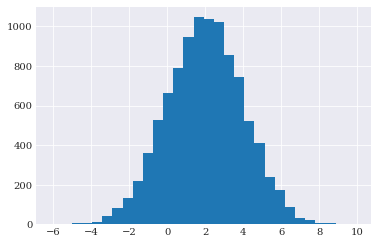

In [3]:
from matplotlib import pyplot

pyplot.hist(normal.sample(10000, seed=1234), 30)
pyplot.show()

The input can be both be a integer, but also a sequence of integers. For
example:

In [4]:
normal.sample([2, 2], seed=1234)

array([[0.2553786 , 2.62204779],
       [1.68653451, 3.58083895]])

### Random seed

Note that the `seed` parameters was passed to ensure reproducability. In
addition to having this flag, all `chaospy` distributions respects `numpy`'s
random seed. So the sample generation can also be done as follows:

In [5]:
import numpy

numpy.random.seed(1234)
normal.sample(4)

array([0.2553786 , 2.62204779, 1.68653451, 3.58083895])

### Probability density function

The probability density function, is a function whose value at any given
sample in the sample space can be interpreted as providing a relative
likelihood that the value of the random variable would equal that sample.
This method is available through
[chaospy.Distribution.pdf()](../../api/chaospy.Distribution.pdf.rst):

In [6]:
normal.pdf([-2, 0, 2])

array([0.02699548, 0.12098536, 0.19947114])

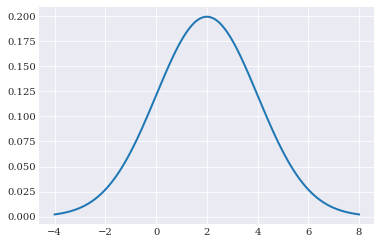

In [7]:
q_loc = numpy.linspace(-4, 8, 200)
pyplot.plot(q_loc, normal.pdf(q_loc))
pyplot.show()

### Cumulative probability function

the cumulative distribution function, defines the probability that a random
variables is at most the argument value provided. This method is available
through
[chaospy.Distribution.cdf()](../../api/chaospy.Distribution.cdf.rst):

In [8]:
normal.cdf([-2, 0, 2])

array([0.02275013, 0.15865525, 0.5       ])

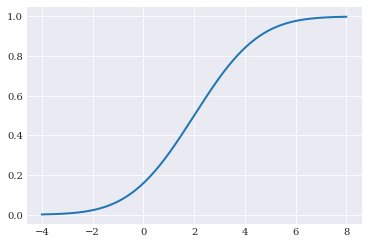

In [9]:
pyplot.plot(q_loc, normal.cdf(q_loc))
pyplot.show()

### Statistical moments

The moments of a random variable giving important descriptive information
about the variable reduced to single scalars. The raw moments is the building
blocks to build these descriptive statistics. The moments are available
through
[chaospy.Distribution.mom()](../../api/chaospy.Distribution.mom.rst):

In [10]:
normal.mom([0, 1, 2])

array([1., 2., 8.])

Not all random variables have raw moment variables, but for these variables
the raw moments are estimated using quadrature integration. This allows for
the moments to be available for all distributions. This approximation can
explicitly be evoked through
[chaospy.approximate_moment()](../../api/chaospy.approximate_moment.rst):

In [11]:
chaospy.approximate_moment(normal, [2])

8.0

See [quadrature integration](./quadrature_integration.ipynb) for more details on how this
is done in practice.

Central moments can be accessed through wrapper functions. The four first
central moments of our random variable are:

In [12]:
(chaospy.E(normal), chaospy.Var(normal),
 chaospy.Skew(normal), chaospy.Kurt(normal))

(array(2.), array(4.), array(0.), array(0.))

See [descriptive statistics](./descriptive_statistics.ipynb) for details on
the functions extracting metrics of interest from random variables.

### Truncation

In the [collection of distributions](../../reference/distribution/collection.rst) some
distribution are truncated by default. However for those that are not, and
that is the majority of distributions, truncation can be invoiced using
[chaospy.Trunc()](../../api/chaospy.Trunc.rst). It supports one-sided
truncation:

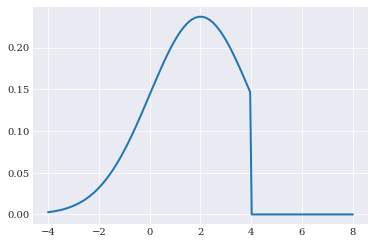

In [13]:
normal_trunc = chaospy.Trunc(normal, upper=4)

pyplot.plot(q_loc, normal_trunc.pdf(q_loc))
pyplot.show()

and two-sided truncation:

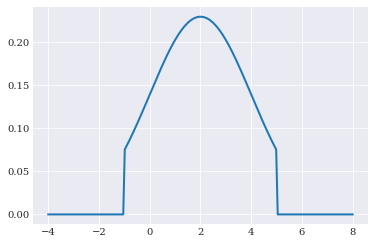

In [14]:
normal_trunc2 = chaospy.Trunc(normal, lower=-1, upper=5)

pyplot.plot(q_loc, normal_trunc2.pdf(q_loc))
pyplot.show()

### Multivariate variables

`chaospy` also supports joint random variables. Some have their own
constructors defined in the
[collection of distributions](../../reference/distribution/collection.rst).
But more practical, multivariate variables can be constructed from univariate
ones through [chaospy.J](../../api/chaospy.J.rst):

In [15]:
normal_gamma = chaospy.J(chaospy.Normal(0, 1), chaospy.Gamma(1))

The multivariate variables have the same functionality as the univariate
ones, except that inputs and the outputs of the methods
[chaospy.Distribution.sample](../../api/chaospy.Distribution.sample.rst),
[chaospy.Distribution.pdf()](../../api/chaospy.Distribution.pdf.rst)
and
[chaospy.Distribution.cdf()](../../api/chaospy.Distribution.cdf.rst)
assumes an extra axis for dimensions. For example:

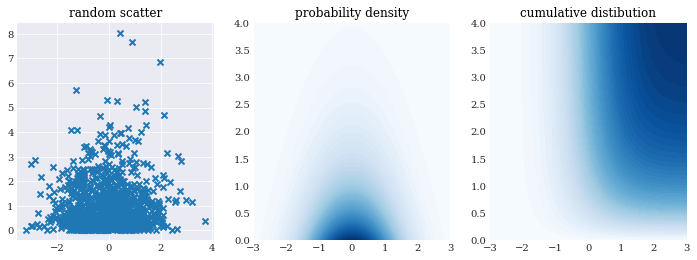

In [16]:
pyplot.rc("figure", figsize=[12, 4])

pyplot.subplot(131)
pyplot.title("random scatter")
pyplot.scatter(*normal_gamma.sample(1000, seed=1000), marker="x")

pyplot.subplot(132)
pyplot.title("probability density")
grid = numpy.mgrid[-3:3:100j, 0:4:100j]
pyplot.contourf(grid[0], grid[1], normal_gamma.pdf(grid), 50)

pyplot.subplot(133)
pyplot.title("cumulative distibution")
pyplot.contourf(grid[0], grid[1], normal_gamma.cdf(grid), 50)

pyplot.show()

### Rosenblatt transformation

One of the more sure-fire ways to create random variables, is to first
generate classical uniform samples and then use a inverse transformation to
map the sample to have the desired properties. In one-dimension, this mapping
is the inverse of the cumulative distribution function, and is available as
[chaospy.Distribution.ppf()](../../api/chaospy.Distribution.ppf.rst):

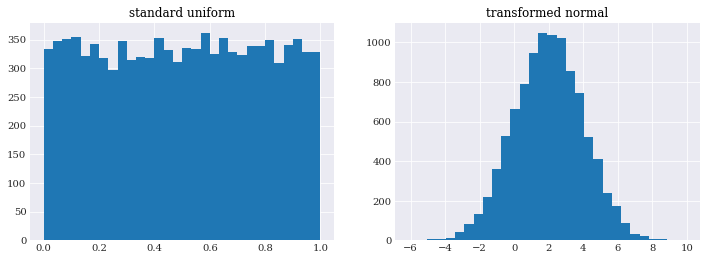

In [17]:
pyplot.subplot(121)
pyplot.title("standard uniform")
u_samples = chaospy.Uniform(0, 1).sample(10000, seed=1234)
pyplot.hist(u_samples, 30)

pyplot.subplot(122)
pyplot.title("transformed normal")
q_samples = normal.inv(u_samples)
pyplot.hist(q_samples, 30)

pyplot.show()

Note that `u_samples` and `q_samples` here consist of independently
identical distributed samples, the joint set `(u_samples, q_samples)` are
not. In fact, they are highly dependent by following the line of the normal
cumulative distribution function shape:

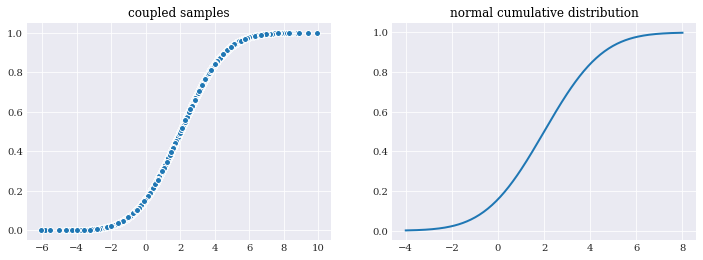

In [18]:
pyplot.subplot(121)
pyplot.title("coupled samples")
pyplot.scatter(q_samples, u_samples)

pyplot.subplot(122)
pyplot.title("normal cumulative distribution")
pyplot.plot(q_loc, normal.cdf(q_loc))

pyplot.show()

This idea also generalizes to the multivariate case. There the mapping
function is called an inverse Rosenblatt transformation $T^{-1}$, and is
defined in terms of conditional distribution functions:

$$
T^{-1}(q_0, q_1, q_2, \dots) =
  \left[ F^{-1}_{Q_0}(q_0),
         F^{-1}_{Q_1\mid Q_0}(q_1),
         F^{-1}_{Q_2\mid Q_1,Q_0}(q_2), \dots \right]
$$

And likewise a forward Rosenblatt transformation is defined as:

$$
T(q_0, q_1, q_2, \dots) =
  \left[ F_{Q_0}(q_0),
         F_{Q_1\mid Q_0}(q_1),
         F_{Q_2\mid Q_1,Q_0}(q_2), \dots \right]
$$

These functions can be used to map samples from standard multivariate uniform
distribution to a distribution of interest, and vise-versa.

In `chaospy` these methods are available through
[chaospy.Distribution.inv()](../../api/chaospy.Distribution.inv.rst)
and
[chaospy.Distribution.fwd()](../../api/chaospy.Distribution.fwd.rst):

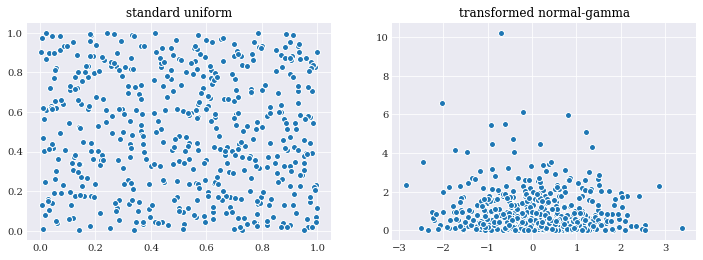

In [19]:
pyplot.subplot(121)
pyplot.title("standard uniform")
uu_samples = chaospy.Uniform(0, 1).sample((2, 500), seed=1234)
pyplot.scatter(*uu_samples)

pyplot.subplot(122)
pyplot.title("transformed normal-gamma")
qq_samples = normal_gamma.inv(uu_samples)
pyplot.scatter(*qq_samples)

pyplot.show()

### User-defined distributions

The [collection of distributions](../../reference/distribution/collection.rst) contains a
lot of distributions, but if one needs something custom, `chaospy` allows for
the construction of user-defined distributions through
[chaospy.UserDistribution](../../api/chaospy.UserDistribution.rst).
These can be constructed by providing three functions: cumulative
distribution function, a lower bounds function, and a upper bounds function.
As an illustrative example, let us recreate the uniform distribution:

In [20]:
def cdf(x_loc, lo, up):
    """Cumulative distribution function."""
    return (x_loc-lo)/(up-lo)

In [21]:
def lower(lo, up):
    """Lower bounds function."""
    return lo

In [22]:
def upper(lo, up):
    """Upper bounds function."""
    return up

The user-define distribution takes these functions, and a dictionary with the
parameter defaults as part of its initialization:

In [23]:
user_distribution = chaospy.UserDistribution(
    cdf=cdf, lower=lower, upper=upper, parameters=dict(lo=-1, up=1))

The distribution can then be used in the same was as any other
[chaospy.Distribution](../../api/chaospy.Distribution.rst):

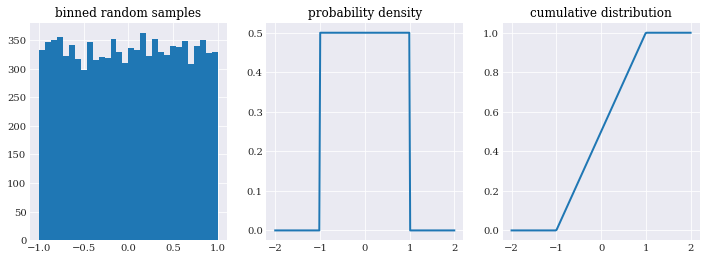

In [24]:
pyplot.subplot(131)
pyplot.title("binned random samples")
pyplot.hist(user_distribution.sample(10000), 30)

pyplot.subplot(132)
pyplot.title("probability density")
x_loc = numpy.linspace(-2, 2, 200)
pyplot.plot(x_loc, user_distribution.pdf(x_loc))

pyplot.subplot(133)
pyplot.title("cumulative distribution")
pyplot.plot(x_loc, user_distribution.cdf(x_loc))

pyplot.show()

Alternative, it is possible to define the same distribution using cumulative
distribution and point percentile function without the bounds:

In [25]:
def ppf(q_loc, lo, up):
    """Point percentile function."""
    return q_loc*(up-lo)+lo


user_distribution = chaospy.UserDistribution(
    cdf=cdf, ppf=ppf, parameters=dict(lo=-1, up=1))

In addition to the required fields, there are a few optional ones. These does
not provide new functionality, but allow for increased accuracy and/or lower
computational cost for the operations where they are used. These include raw
statistical moments which is used by
[chaospy.Distribution.mom()](../../api/chaospy.Distribution.rst):

In [26]:
def mom(k_loc, lo, up):
    """Raw statistical moment."""
    return (up**(k_loc+1)-lo**(k_loc+1))/(k_loc+1)/(up-lo)

And three terms recurrence coefficients which is used by the method
[chaospy.Distribution.ttr()](../../api/chaospy.Distribution.ttr.rst)
to pass analytically to Stieltjes' method:

In [27]:
def ttr(k_loc, lo, up):
    """Three terms recurrence."""
    return 0.5*up+0.5*lo, k_loc**2/(4*k_loc**2-1)*lo**2

What these coefficients are and why they are important are discussed in the
section [orthogonal polynomials](../polynomial/orthogonality.ipynb).